<a href="https://colab.research.google.com/github/yahya05/Bank_loan/blob/main/Loan_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/train.csv",index_col='Loan_ID')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 12)

In [ ]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


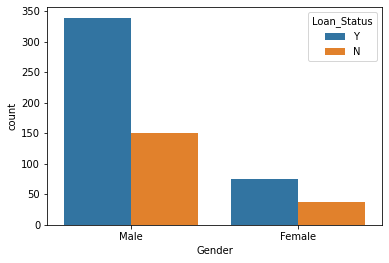

In [ ]:
sns.countplot(x='Gender',hue='Loan_Status', data=df )

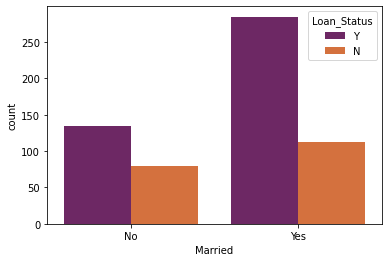

In [ ]:
sns.countplot(x='Married',hue='Loan_Status', data=df,palette = 'inferno' )

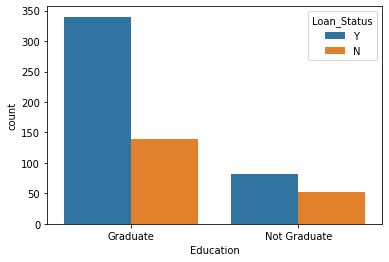

In [ ]:
sns.countplot(x='Education',hue='Loan_Status', data=df )

In [ ]:

labels = df['Education'].unique()
values = df['Education'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout(
                   title_text = 'Graduated clients',
                   title_font = dict(size=25,family='Verdana', 
                                     color='black'))
fig.show()

In [ ]:
labels = df['Married'].unique()
values = df['Married'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels,  values=values, hole=.3)]
               )
fig.update_layout(
                   title_text = 'Married clients',
                   title_font = dict(size=25,family='Verdana', 
                                     color='black'))
fig.show()

Text(0.5, 0, 'Self_Employed')

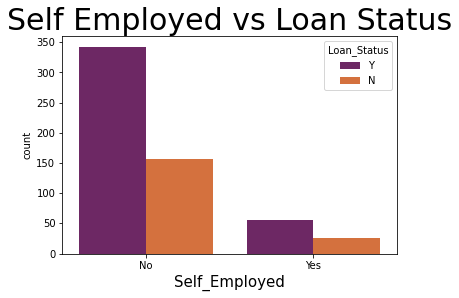

In [ ]:
sns.countplot(x='Self_Employed',hue='Loan_Status', data=df,palette = 'inferno' )
plt.title('Self Employed vs Loan Status', fontsize = 30)
plt.xlabel('Self_Employed', fontsize = 15)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



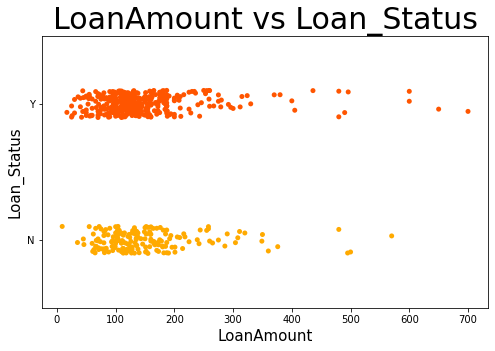

In [ ]:
# LoanAmount vs Loan_Status

plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(df['LoanAmount'], df['Loan_Status'], palette = 'autumn', orient = 'h')
plt.title('LoanAmount vs Loan_Status', fontsize = 30)
plt.xlabel('LoanAmount', fontsize = 15)
plt.ylabel('Loan_Status', fontsize = 15)
plt.show()

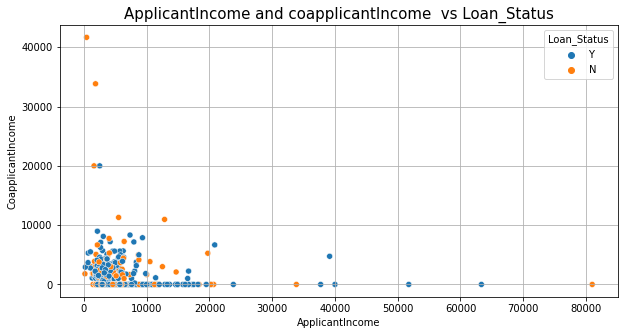

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('ApplicantIncome and coapplicantIncome  vs Loan_Status', fontsize = 15)
plt.grid()
sns.scatterplot(data=df, x="ApplicantIncome", y="CoapplicantIncome", hue="Loan_Status")

In [ ]:
df.dropna(subset=['Loan_Status'], inplace=True, axis=0)
label = LabelEncoder()

df['Loan_Status']= label.fit_transform(df['Loan_Status'])

X=df.drop(['Loan_Status'], axis=1)
y=df['Loan_Status']
y.astype('float64')
X_train, X_valid, y_train, y_valid = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
cat_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
print(cat_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [ ]:
numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']]
print(numerical_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [ ]:

my_imputer_cat = SimpleImputer(strategy='most_frequent')
imputed_X_train_cat =pd.DataFrame(my_imputer_cat.fit_transform(X_train[cat_cols]))
imputed_X_valid_cat =pd.DataFrame(my_imputer_cat.transform(X_valid[cat_cols]))
imputed_X_train_cat.columns =cat_cols
imputed_X_valid_cat.columns = cat_cols


my_imputer_num = SimpleImputer(strategy='constant')
imputed_X_train_num =pd.DataFrame(my_imputer_cat.fit_transform(X_train[numerical_cols]))
imputed_X_valid_num =pd.DataFrame(my_imputer_cat.transform(X_valid[numerical_cols]))
imputed_X_train_num.columns =numerical_cols 
imputed_X_valid_num.columns = numerical_cols 

In [ ]:
imputed_X_train_num.isnull().any()

ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
dtype: bool

In [ ]:
imputed_X_train_cat.isnull().any()

Gender           False
Married          False
Dependents       False
Education        False
Self_Employed    False
Property_Area    False
dtype: bool

In [ ]:

ordinal_encoder = OrdinalEncoder()
imputed_X_train_cat[cat_cols]= ordinal_encoder.fit_transform(imputed_X_train_cat[cat_cols])
imputed_X_valid_cat[cat_cols] = ordinal_encoder.transform(imputed_X_valid_cat[cat_cols])


In [ ]:
print(imputed_X_train_cat.dtypes)

Gender           float64
Married          float64
Dependents       float64
Education        float64
Self_Employed    float64
Property_Area    float64
dtype: object


In [ ]:
_X_train = pd.concat([imputed_X_train_cat, imputed_X_train_num], axis=1)
_X_test=pd.concat([imputed_X_valid_cat, imputed_X_valid_num], axis=1)

In [ ]:
_X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,1.0,0.0,0.0,0.0,1.0,2958.0,2900.0,131.0,360.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,11250.0,0.0,196.0,360.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,3948.0,1733.0,149.0,360.0,0.0
3,0.0,0.0,0.0,0.0,0.0,2.0,3813.0,0.0,116.0,180.0,1.0
4,1.0,1.0,2.0,0.0,0.0,1.0,4708.0,1387.0,150.0,360.0,1.0


In [ ]:

std_scaler = StandardScaler()
_X_train[_X_train.columns]= std_scaler.fit_transform(_X_train[_X_train.columns])
_X_test[_X_test.columns] = std_scaler.transform(_X_test[_X_test.columns])

In [ ]:
_X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.473750,0.711432,-0.763047,-0.531022,-0.40436,-0.051666,-0.400019,0.493485,-0.175377,0.269838,0.417901
1,0.473750,-1.405616,0.225491,-0.531022,-0.40436,-0.051666,0.846479,-0.547973,0.574008,0.269838,0.417901
2,0.473750,0.711432,-0.763047,-0.531022,-0.40436,-1.320074,-0.251196,0.074388,0.032145,0.269838,-2.392912
3,-2.110819,-1.405616,-0.763047,-0.531022,-0.40436,1.216742,-0.271490,-0.547973,-0.348312,-2.577377,0.417901
4,0.473750,0.711432,1.214029,-0.531022,-0.40436,-0.051666,-0.136949,-0.049869,0.043674,0.269838,0.417901


In [ ]:

model = RandomForestClassifier(n_estimators=70, random_state=0)

model.fit(_X_train, y_train)
yhat = model.predict(_X_test)

# Evaluate the model
score = mean_absolute_error(y_valid, yhat)
print('MAE:', score)
prediction = pd.DataFrame({
        
        "Loan_Status_pred":yhat,  "Loan_Status":y_valid,
})
prediction.head(10)

MAE: 0.2032520325203252


,Loan_Status_pred,Loan_Status
Loan_ID,,
LP002453,1,1
LP001164,1,0
LP002734,1,1
LP002505,0,0
LP001194,1,1
LP001207,0,0
LP002740,1,1
LP002386,0,1
LP002188,0,0


In [ ]:
prediction.shape

(123, 2)

In [ ]:
#evaluating the model
cnf_matrix = metrics.confusion_matrix(y_valid, yhat)
print(cnf_matrix)

[[16 17]
 [ 8 82]]


Text(0.5, 320.8, 'Predicted label')

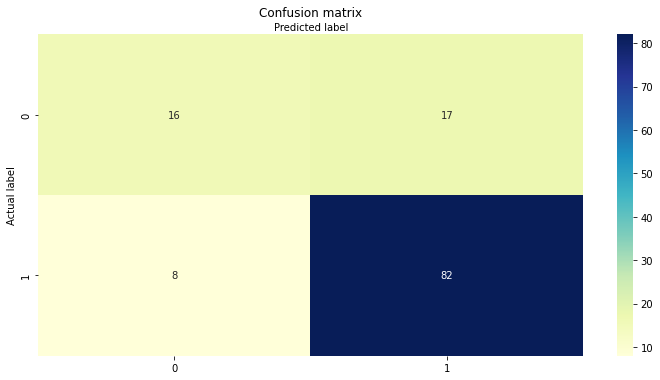

In [ ]:
#make confusion matrix
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_valid, yhat))
print("Precision:",metrics.precision_score(y_valid, yhat))
print("Recall:",metrics.recall_score(y_valid, yhat))

Accuracy: 0.7967479674796748
Precision: 0.8282828282828283
Recall: 0.9111111111111111
